In [93]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 10)

In [94]:
N = 1000
X, y = make_classification(n_features=2, n_redundant=0, n_samples=N)

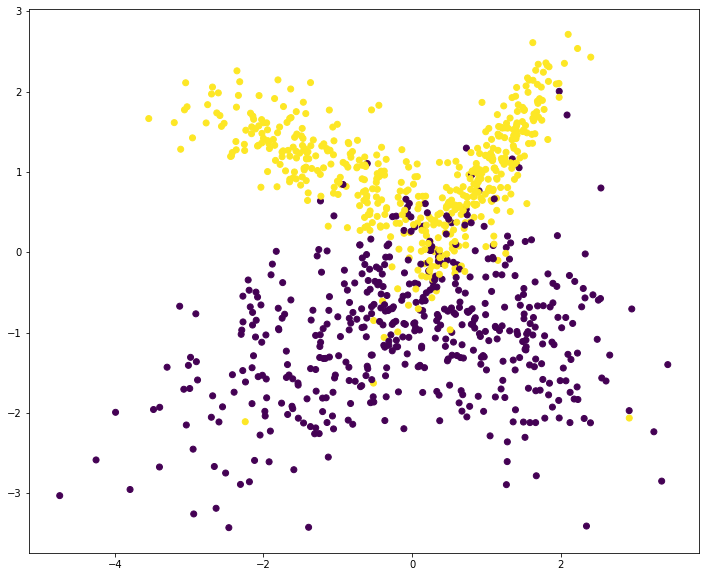

In [95]:
plt.scatter(*X.transpose(), c=y)

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [97]:
model = KNeighborsClassifier(n_neighbors=15).fit(X, y)

In [98]:
import numpy

In [99]:
n = 40
xs, ys = [numpy.linspace(X[:,i].min(), X[:,i].max(), 40) for i in (0,1)]

In [100]:
xs

array([-4.74002435, -4.53033407, -4.32064378, -4.1109535 , -3.90126322,
       -3.69157294, -3.48188265, -3.27219237, -3.06250209, -2.85281181,
       -2.64312152, -2.43343124, -2.22374096, -2.01405068, -1.80436039,
       -1.59467011, -1.38497983, -1.17528955, -0.96559927, -0.75590898,
       -0.5462187 , -0.33652842, -0.12683814,  0.08285215,  0.29254243,
        0.50223271,  0.71192299,  0.92161328,  1.13130356,  1.34099384,
        1.55068412,  1.7603744 ,  1.97006469,  2.17975497,  2.38944525,
        2.59913553,  2.80882582,  3.0185161 ,  3.22820638,  3.43789666])

In [101]:
xx, yy = numpy.meshgrid(xs, ys)

In [102]:
xx.size

1600

In [103]:
z = model.predict(numpy.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

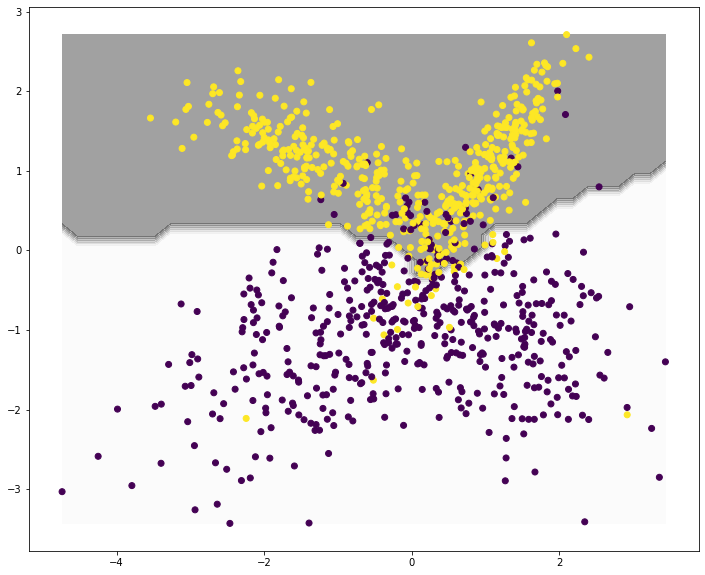

In [104]:
plt.contourf(xx,yy,z, alpha=0.4, cmap='Greys')
plt.scatter(*X.T, c=y)

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, cv=5)

array([0.88557214, 0.935     , 0.885     , 0.915     , 0.91959799])

In [107]:
ks = range(5, 50, 5)

In [108]:
import numpy as np
import pandas as pd


In [109]:
scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=5) for k in ks]
mean_scores = np.mean(scores, axis=1)
std_scores = np.std(scores, axis=1)
mean_scores

array([0.90803403, 0.904989  , 0.9079791 , 0.91500423, 0.9150092 ,
       0.91499915, 0.91500413, 0.91599417, 0.91499412])

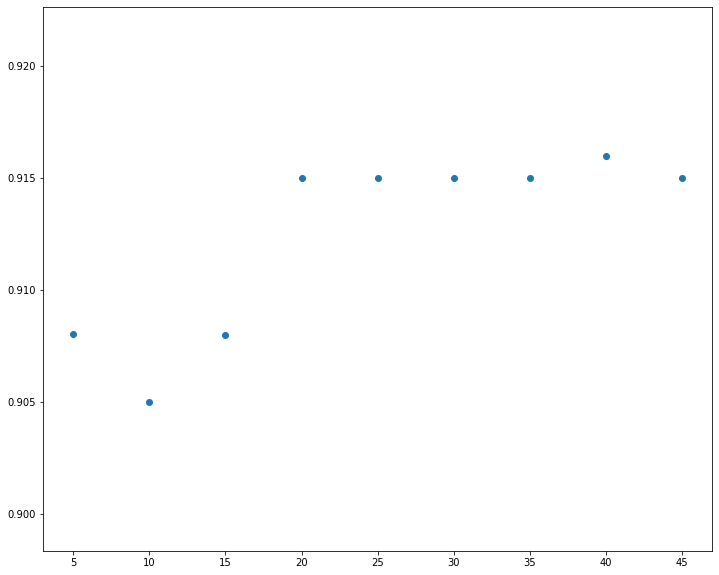

In [111]:
plt.scatter(ks, mean_scores)

<ErrorbarContainer object of 3 artists>

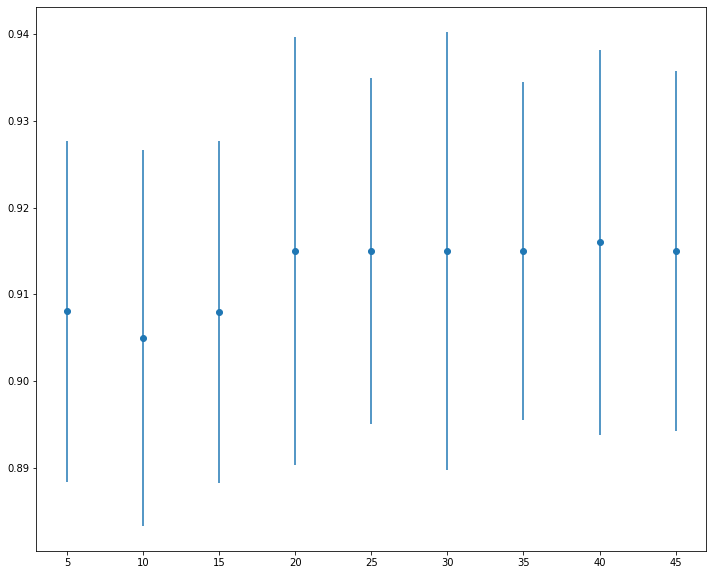

In [112]:
plt.errorbar(ks, mean_scores, yerr=std_scores,fmt='o')